In [1]:
import xarray as xr
import glob
import numpy as np
import matplotlib.pyplot as plt
from utils import *

In [2]:
# Setup your PBSCluster
import dask
from dask_jobqueue import PBSCluster
from dask.distributed import Client
ncores=1
nmem='10GB'
cluster = PBSCluster(
    cores=ncores, # The number of cores you want
    memory=nmem, # Amount of memory
    processes=1, # How many processes
    queue='casper', # The type of queue to utilize (/glade/u/apps/dav/opt/usr/bin/execcasper)
    local_directory='$TMPDIR', # Use your local directory
    resource_spec='select=1:ncpus='+str(ncores)+':mem='+nmem, # Specify resources
    account='P93300041', # Input your project ID here
    walltime='01:00:00', # Amount of wall time
)

/glade/work/djk2120/miniconda3/envs/ppe-py/lib/python3.11/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 39357 instead
  warnings.warn(


In [3]:
cluster.scale(30)
client = Client(cluster)

In [4]:
client.cluster

PBSCluster(660ae11c, 'tcp://128.117.208.103:39995', workers=30, threads=30, memory=279.30 GiB)

In [ ]:
from math import log10, floor
def round_sig(x, sig=3):
    return np.round(x, sig-int(floor(log10(abs(x))))-1)

In [5]:
#read in the fullgrid data
d='/glade/derecho/scratch/slevis/archive/ctsm53017_f19_BNF_hist/lnd/hist/'
files=sorted(glob.glob(d+'*h1*'))
ds=xr.open_mfdataset(files,combine='by_coords',parallel=True)
ds=fix_time(ds)

In [33]:
#helpers
fgmap=xr.open_dataset('pftmean/fgmap.nc').fgmap
tmp=xr.open_dataset('pftmean/lapft_ctsm5.3.012.nc')
lapft=tmp.lapfty
apft=tmp.lafg

In [37]:
#define some groups
g=ds.pfts1d_itype_veg.isel(time=0,pft=fgmap)
g.name='pft'
g1=xr.DataArray(g.values,dims='pft')
g1.name='pft'
pft=ds.pfts1d_itype_veg.isel(time=0)
pft.name='pft'

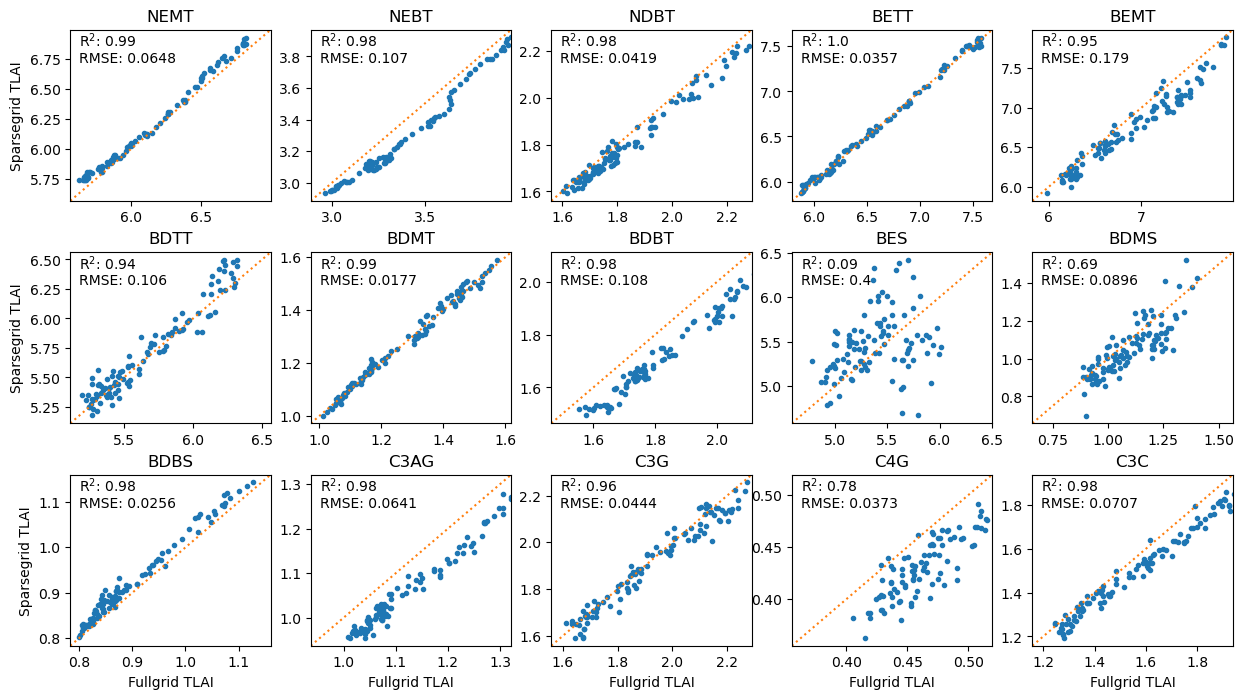

In [108]:
v='TLAI'
x=amean(ds[v])
xsg=(lapft.values.T*x.isel(pft=fgmap)).groupby(g).sum()/lapft.groupby(g1).sum()
xfg=(apft*x).groupby(pft).sum()/apft.groupby(pft).sum()
plt.figure(figsize=[15,8])
for p in range(1,16):

    a=xfg.isel(pft=p)
    b=xsg.isel(pft=p)
    
    x1=min(a.min(),b.min())
    x2=max(a.min(),b.max())
    
    xmin=x1-0.05*(x2-x1)
    xmax=x2+0.05*(x2-x1)
    
    plt.subplot(3,5,p)
    plt.plot(a,b,'.')
    plt.title(pfts[p])
    if p%5==1:
        plt.ylabel('Sparsegrid '+v)
    if p>10:
        plt.xlabel('Fullgrid '+v)
    
    r2=np.round(np.corrcoef(a,b)[0,1]**2,2)
    rmse=round_sig(np.sqrt(np.mean((a-b)**2)).values)
    
    plt.plot([xmin,xmax],[xmin,xmax],':')
    plt.xlim([xmin,xmax])
    plt.ylim([xmin,xmax])
    plt.text(x1,x2-0.06*(x2-x1),'R$^2$: '+str(r2));
    plt.text(x1,x2-0.16*(x2-x1),'RMSE: '+str(rmse));

plt.subplots_adjust(hspace=0.3,wspace=0.2)
plt.savefig('pftmean/tlai_pftmean.png',dpi=300,bbox_inches='tight')

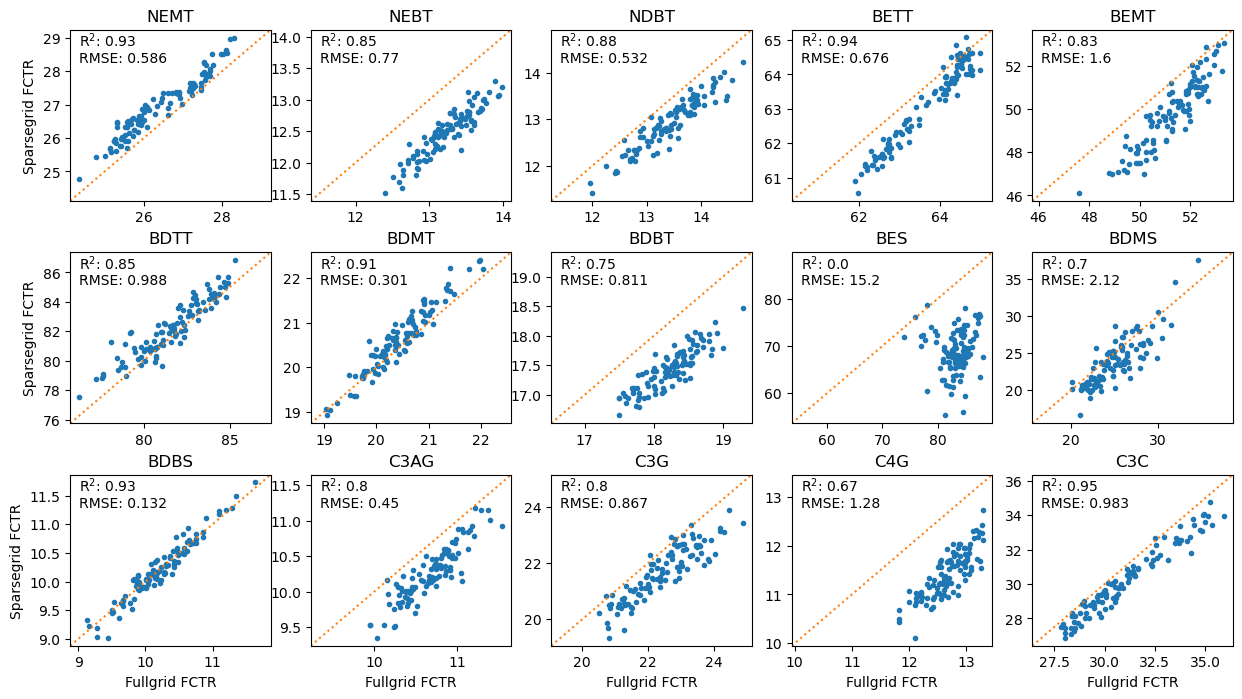

In [110]:
v='FCTR'
x=amean(ds[v])
xsg=(lapft.values.T*x.isel(pft=fgmap)).groupby(g).sum()/lapft.groupby(g1).sum()
xfg=(apft*x).groupby(pft).sum()/apft.groupby(pft).sum()
plt.figure(figsize=[15,8])
for p in range(1,16):

    a=xfg.isel(pft=p)
    b=xsg.isel(pft=p)
    
    x1=min(a.min(),b.min())
    x2=max(a.max(),b.max())
    
    xmin=x1-0.05*(x2-x1)
    xmax=x2+0.05*(x2-x1)
    
    plt.subplot(3,5,p)
    plt.plot(a,b,'.')
    plt.title(pfts[p])
    if p%5==1:
        plt.ylabel('Sparsegrid '+v)
    if p>10:
        plt.xlabel('Fullgrid '+v)
    
    r2=np.round(np.corrcoef(a,b)[0,1]**2,2)
    rmse=round_sig(np.sqrt(np.mean((a-b)**2)).values)
    
    plt.plot([xmin,xmax],[xmin,xmax],':')
    plt.xlim([xmin,xmax])
    plt.ylim([xmin,xmax])
    plt.text(x1,x2-0.06*(x2-x1),'R$^2$: '+str(r2));
    plt.text(x1,x2-0.16*(x2-x1),'RMSE: '+str(rmse));

plt.subplots_adjust(hspace=0.3,wspace=0.2)

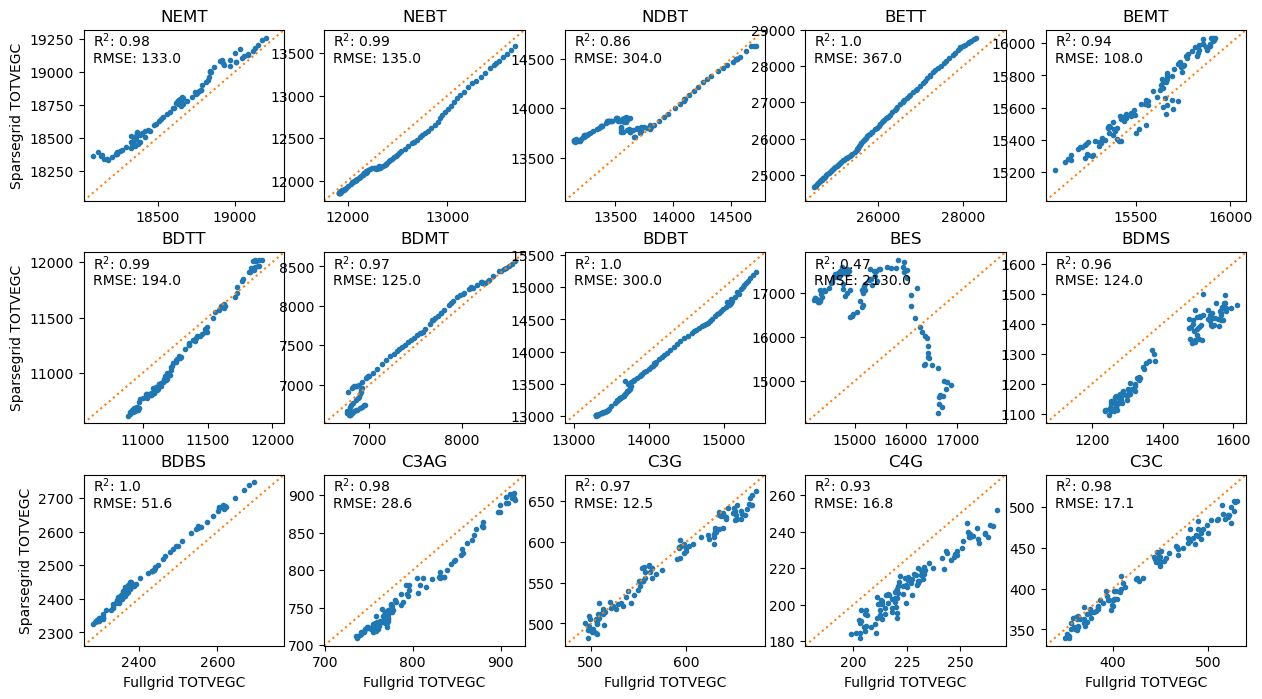

In [111]:
v='TOTVEGC'
x=amean(ds[v])
xsg=(lapft.values.T*x.isel(pft=fgmap)).groupby(g).sum()/lapft.groupby(g1).sum()
xfg=(apft*x).groupby(pft).sum()/apft.groupby(pft).sum()
plt.figure(figsize=[15,8])
for p in range(1,16):

    a=xfg.isel(pft=p)
    b=xsg.isel(pft=p)
    
    x1=min(a.min(),b.min())
    x2=max(a.max(),b.max())
    
    xmin=x1-0.05*(x2-x1)
    xmax=x2+0.05*(x2-x1)
    
    plt.subplot(3,5,p)
    plt.plot(a,b,'.')
    plt.title(pfts[p])
    if p%5==1:
        plt.ylabel('Sparsegrid '+v)
    if p>10:
        plt.xlabel('Fullgrid '+v)
    
    r2=np.round(np.corrcoef(a,b)[0,1]**2,2)
    rmse=round_sig(np.sqrt(np.mean((a-b)**2)).values)
    
    plt.plot([xmin,xmax],[xmin,xmax],':')
    plt.xlim([xmin,xmax])
    plt.ylim([xmin,xmax])
    plt.text(x1,x2-0.06*(x2-x1),'R$^2$: '+str(r2));
    plt.text(x1,x2-0.16*(x2-x1),'RMSE: '+str(rmse));

plt.subplots_adjust(hspace=0.3,wspace=0.2)

### pft abbreviations

In [43]:
p=xr.open_dataset('/glade/campaign/asp/djk2120/PPEn11/paramfiles/OAAT0000.nc')

In [44]:
pftnames=xr.DataArray([str(p)[2:-2].strip() for p in p.pftname[:17].values],dims='pft')

In [45]:
k={'not':'B',
   'vegetated':'G',
   'temperate':'M',
   'non-arctic':'',
   'c3':'C3',
   'c4':'C4'}

In [52]:
pfts=[]
for p in pftnames.values:
    s=''
    for x in p.split('_'):
        if x in k:
            s+=k[x]
        else:
            s+=x[0].upper()
    pfts.append(s)
        

In [53]:
pfts

['BG',
 'NEMT',
 'NEBT',
 'NDBT',
 'BETT',
 'BEMT',
 'BDTT',
 'BDMT',
 'BDBT',
 'BES',
 'BDMS',
 'BDBS',
 'C3AG',
 'C3G',
 'C4G',
 'C3C',
 'C3I']

### should write this to a file

In [7]:
tmp0=xr.open_dataset(files[0])
a=(tmp0.landfrac*tmp0.area*(tmp0.lat>-60)).fillna(0)  #mask antarctica

In [8]:
nlon=len(a.lon)
nlat=len(a.lat)
ix=((tmp0.pfts1d_jxy-1)*nlon+tmp0.pfts1d_ixy-1).astype(int)

In [9]:
def pp(ds):
    return ds['pfts1d_wtgcell']
wtg=xr.open_mfdataset(files[::12],combine='nested',concat_dim='year',preprocess=pp)
wtg['year']=range(1920,2024)
apft=(a.stack({'gc':['lat','lon']}).isel(gc=ix)*wtg).compute()